In [62]:
# as usual we need to import the key libraries we need to store, analyse and plot the network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [63]:
# let's also get a network from the folder "data"
a=open("USPTO_2012_3_proj_edgelist.csv","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Dainhon', 'Jochugiku', 'Co.', 'Ltd.,Educational', 'Foundation', 'Nihon', 'University']
['Universite', 'de', 'Bordeaux', '1,Centre', 'Hospitalier', 'Universitaire', 'De', 'Besancon']
['Shanghai', 'Biomodel', 'Organism', 'Science', '&', 'Technology', 'Co.', 'Ltd.,Shanghai', 'Research', 'Center', 'for', 'Model', 'Organisms']
['Reata', 'Pharmaceuticals', 'Inc.,Trustees', 'of', 'Dartmouth', 'College']
['GENTEX', 'CORPORATION,Icahn', 'School', 'of', 'Medicine', 'at', 'Mount', 'Sinai']
['GENTEX', 'CORPORATION,Optein', 'Inc.']
['Health', 'Research', 'Inc.,The', 'Regents', 'of', 'The', 'University', 'of', 'Michigan']
['Health', 'Research', 'Inc.,Research', 'Foundation', 'of', 'State', 'University', 'of', 'New', 'York']
['ST.', "MICHAEL'S", 'HOSPITAL,KING', 'SAUD', 'UNIVERSITY']
["Children's", 'Medical', 'Center', 'Corporation,The', 'Trustees', 'of', 'Columbia', 'University', 'in', 'the', 'City', 'of', 'New', 'York']
["Children's", 'Medical', 'Center', 'Corporation,Institut', 'Pasteur']
["Chil

In [64]:
# the data comes as unweighted list of edges
# let's store the network
G=nx.Graph()
c=0
a=open("USPTO_2012_3_proj_edgelist.csv","r")
for i in a:
    n=i.strip().split(",")
    G.add_edge(n[0],n[1])
    c+=1
a.close()

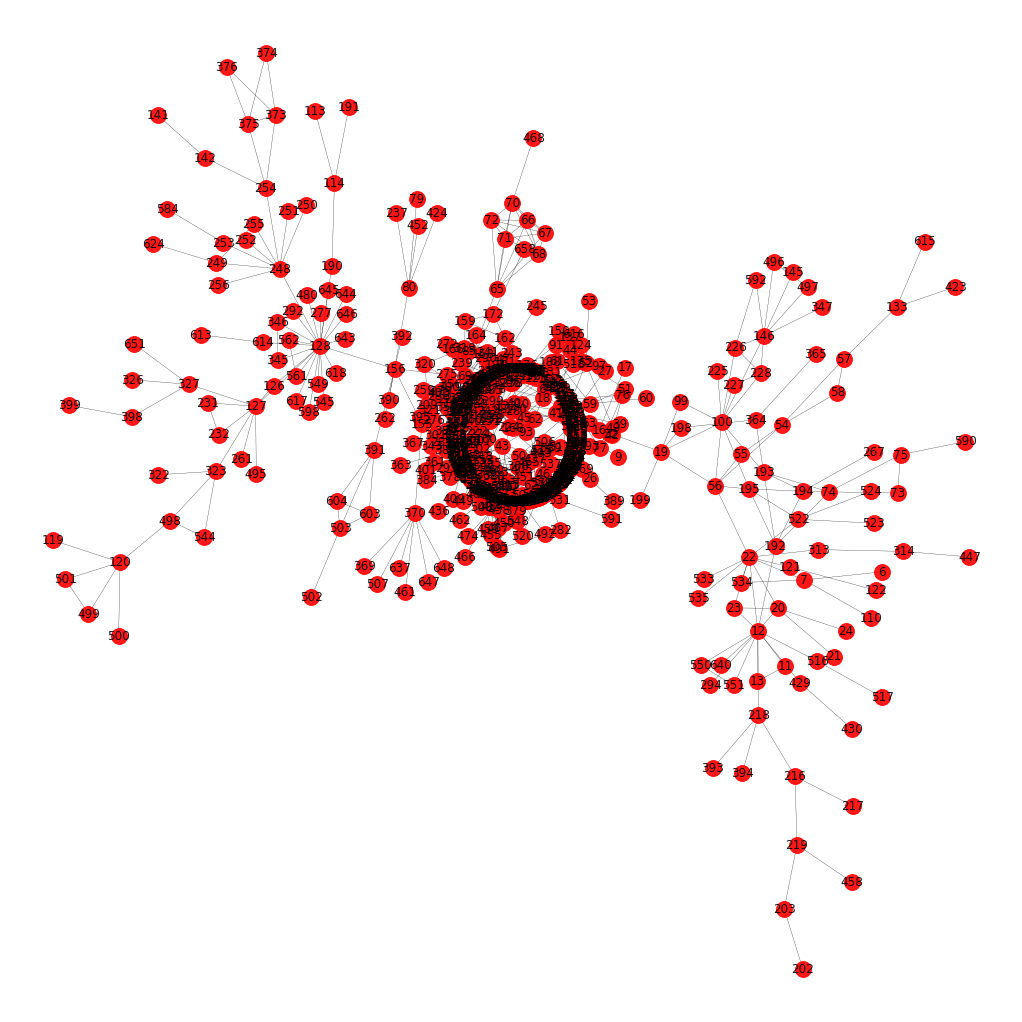

In [65]:
ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=counter
    counter+=1

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [66]:
degree=[]  # list of degree
for i in G.nodes():
        degree.append([G.degree(i),i])   # we put in the list a list of two values, the degree and id of each node
        
        
degree=sorted(degree,reverse=True)

In [67]:
for i in range(30):
    print ("Rank = ",i+1,"Degree = ", degree[i][0], "Node id = ",degree[i][1])

Rank =  1 Degree =  22 Node id =  The Regents of the University of California
Rank =  2 Degree =  21 Node id =  Centre National de la Recherche Scientifique (CNRS)
Rank =  3 Degree =  13 Node id =  The Regents of The University of Michigan
Rank =  4 Degree =  11 Node id =  The United States of America as represented by the Secretary Department of Health & Human Services
Rank =  5 Degree =  10 Node id =  Massachusetts Institute of Technology
Rank =  6 Degree =  9 Node id =  Board of Regents University of Texas System
Rank =  7 Degree =  8 Node id =  The United States of America as represented by the Department of Energy
Rank =  8 Degree =  8 Node id =  The Scripps Research Institute
Rank =  9 Degree =  8 Node id =  Northeastern University
Rank =  10 Degree =  7 Node id =  Universite Paris Descartes
Rank =  11 Degree =  7 Node id =  Novartis AG
Rank =  12 Degree =  7 Node id =  Genethon
Rank =  13 Degree =  6 Node id =  Universite d'Evry-Val-d'Essonne
Rank =  14 Degree =  6 Node id =  Th

In [68]:
def centrality_histogram(G,bins,color_bars,alpha_value,centrality_measure): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    
    # here we define which centrality measure to consider
    if centrality_measure=="betweenness":
        l=nx.betweenness_centrality(G)
        
    if centrality_measure=="closeness":
        l=nx.closeness_centrality(G)
        
    if centrality_measure=="degree":
        l={}
        for i in G.nodes():
            l[i]=G.degree(i)
        
    # the plot is then done after the selection of the centrality measure
    
    
    cent_list=[]
    for i in l:
            cent_list.append(l[i])
    
    plt.hist(cent_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel(centrality_measure)  # note how "centrality_measure" is an input of the function now!
    plt.ylabel('Frequency')

    plt.show()

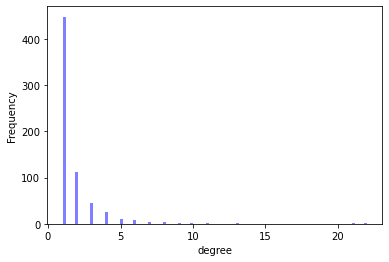

In [69]:
centrality_histogram(G,100,'blue',0.5,'degree')

In [70]:
average_degree=2.*G.number_of_edges()/G.number_of_nodes() # why?!

print (average_degree)

1.724659606656581


In [11]:
degree_list=[]
for i in G.nodes():
    degree_list.append(G.degree(i))
    
degree_list=sorted(degree_list)

print ("min value= ",degree_list[0])
print ('max value= ', degree_list[-1])

min value=  1
max value=  22


In [12]:
variance=0.
for i in degree_list:
    variance+=(i-average_degree)**2/(G.number_of_nodes())
    

print (variance)

3.0618578644652006


In [13]:
degree_array=np.zeros(G.number_of_nodes(),float)
counter=0
for i in G.nodes():
    degree_array[counter]=G.degree(i)
    counter+=1
    
print ("Average Degree =",degree_array.mean())
print ("Variance =", degree_array.std()**2.)

Average Degree = 1.724659606656581
Variance = 3.061857864465201


In [15]:

from logbin import*

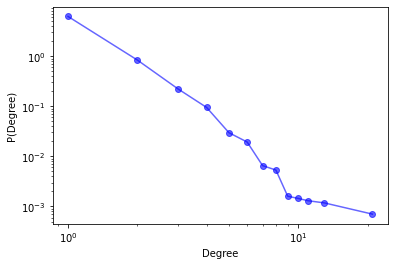

In [16]:
dict_degree={}
for i in G.nodes():
    dict_degree[i]=G.degree(i)
    
    
# we can then pass the dictionary to the logbin fucntion, which bins (logaritmically) the distribution
binned=log_bin(dict_degree,30)

# the function retunrs the x and y of the binned distribution
x=[]
y=[]

for i in binned:
    x.append(i[0])
    y.append(i[1])
    
# we can then plot it
# since we considered a logarithmic bin, it is better to plot the log values of x and y

plt.plot(x,y, color='blue',alpha=0.6,marker='o')
plt.xlabel('Degree')
plt.ylabel('P(Degree)')

# this is how you set the log scale in each axis
plt.yscale('log') 
plt.xscale('log')
plt.show()

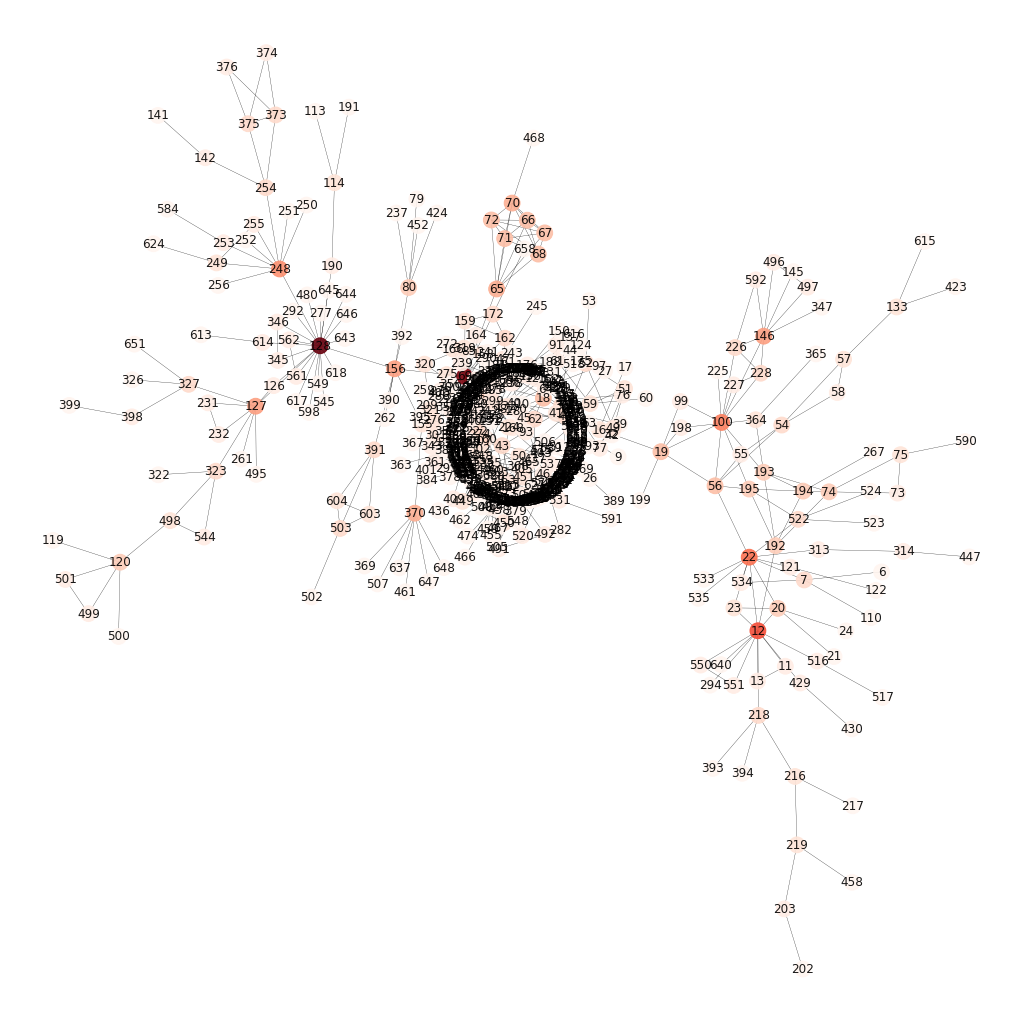

In [17]:
code_color=[]
for i in G.nodes():
    code_color.append(G.degree(i))

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=12)

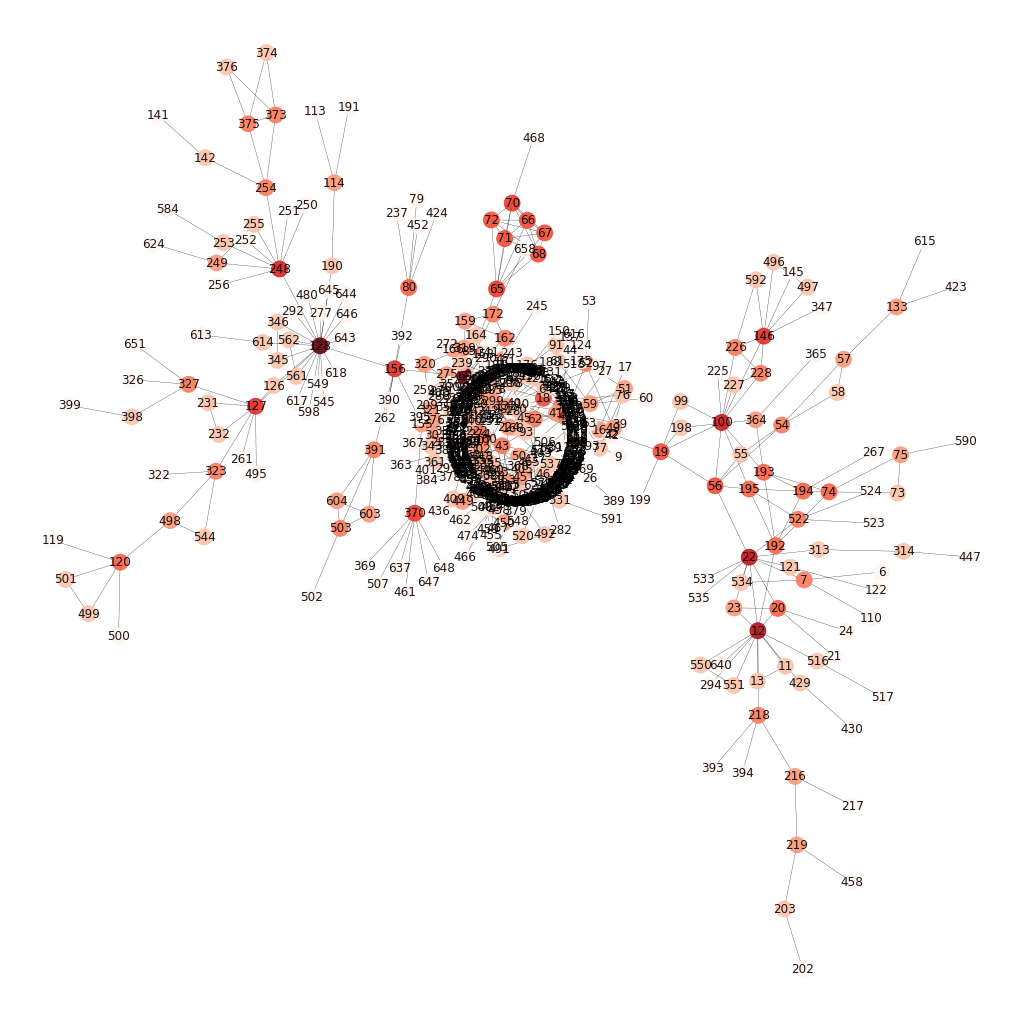

In [18]:
code_color=[]
for i in G.nodes():
    code_color.append(log(G.degree(i)))  # note the log here

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=12)

In [19]:

a=open("USPTO_2012_3_proj_attributes.csv","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['ID,Patent_industry,University,Patent_count,Turnover_lay,Turnover_2012,Total_assets_2012,Employees_2012,R&D_2012,Country_code']
['The', 'United', 'States', 'of', 'America', 'represented', 'by', 'the', 'Department', 'of', 'Health', 'and', 'Human', 'Services', ',3,0,2,79662,,,,,2']
['The', 'Regents', 'of', 'the', 'University', 'of', 'California,3,1,5684,,,,,,1']
['The', 'Regents', 'of', 'The', 'University', 'of', 'Michigan,3,1,378,350000,,,,,1']
['Trustees', 'of', 'Boston', 'University,3,1,60,3000000,,,,,1']
['California', 'Institute', 'of', 'Technology,3,1,702,350000,,,,,1']
['Cornell', 'Research', 'Foundation', 'Inc.,3,1,40,3000000,,,,,1']
['University', 'of', 'Southern', 'California,3,1,315,3000000,,,,,1']
['Lawrence', 'Livermore', 'National', 'Security', 'LLC.,3,0,47,,,,,,']
['The', 'Board', 'of', 'Trustees', 'of', 'the', 'Leland', 'Stanford', 'Junior', 'University,3,1,792,,,,,,1']
['Brigham', 'and', "Women's", 'Hospital,3,0,16,,,,,,1']
['Massachusetts', 'Institute', 'of', 'Technolo

In [23]:
counter=0
a=open("USPTO_2012_3_proj_attributes.csv","r")
for i in a:
    if counter>10:
        # the format is "company name" country revenue employees country_code
        # so we first use \" to extract the company name
        # then we split what is on the right using simple spaces
        n=i.strip().split(",") 
        print (n[0],n[1],n[2],n[3],n[4].strip().split())
    counter+=1
a.close()

Massachusetts Institute of Technology 3 1 1350 ['750000']
University of Massachusetts 3 1 168 ['17500']
Whitehead Institute for Biomedical Research  3 0 36 ['750000']
Centre National de la Recherche Scientifique (CNRS) 3 0 736 []
UNIVERSITE  D 'AIX-MARSEILLE 3 1 9 []
COMMISSARIAT A L'ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES 3 0 582 []
Research Foundation of State University of New York 3 1 120 ['7500000']
University of Washington 3 1 63 ['750000']
Toyota Motor Engineering & Manufacturing North America Inc. 3 0 680 ['276669260']
UNIVERSITY OF NOTRE DAME 3 1 12 ['350000']
Oregon Health & Science University 3 1 18 ['350000']
Board of Regents University of Texas System 3 1 1064 []
The President and Fellows of Harvard College 3 0 100 ['37500']
The University of North Carolina at Chapel Hill 3 1 40 []
Georgia Tech Research Corp. 3 0 220 ['175000']
Toyota Motor Corporation 3 0 28 ['276669260']
Children's Medical Center Corporation 3 0 28 []
Pioneer Hi Bred International Inc 3 0 836 ['624

In [61]:
counter=0
a=open("USPTO_2012_3_proj_attributes.csv","r")
for i in a:
    if counter>10:
        n=i.strip().split(",")
        id_node=n[0]
        patent_industry=n[1].strip().split()[0]
        university=n[2].strip().split()[0]
        patent_count=int(n[3].strip().split()[0])
        turn_over=n[4].strip().split()
        print (id_node,patent_industry,university, patent_count,turn_over)
    counter+=1
a.close()
print ("Number of nodes: ",G.number_of_nodes())
print ("Number of edges: ",G.number_of_edges())

Massachusetts Institute of Technology 3 1 1350 ['750000']
University of Massachusetts 3 1 168 ['17500']
Whitehead Institute for Biomedical Research  3 0 36 ['750000']
Centre National de la Recherche Scientifique (CNRS) 3 0 736 []
UNIVERSITE  D 'AIX-MARSEILLE 3 1 9 []
COMMISSARIAT A L'ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES 3 0 582 []
Research Foundation of State University of New York 3 1 120 ['7500000']
University of Washington 3 1 63 ['750000']
Toyota Motor Engineering & Manufacturing North America Inc. 3 0 680 ['276669260']
UNIVERSITY OF NOTRE DAME 3 1 12 ['350000']
Oregon Health & Science University 3 1 18 ['350000']
Board of Regents University of Texas System 3 1 1064 []
The President and Fellows of Harvard College 3 0 100 ['37500']
The University of North Carolina at Chapel Hill 3 1 40 []
Georgia Tech Research Corp. 3 0 220 ['175000']
Toyota Motor Corporation 3 0 28 ['276669260']
Children's Medical Center Corporation 3 0 28 []
Pioneer Hi Bred International Inc 3 0 836 ['624